# **Part 1**

In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


In [12]:
# Read the data
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t')

In [13]:
df.head()


,Review,Liked
0,Wow... Loved this place. 25 times,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **Text Processing**

In [14]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Steps for cleaning the first review and apply for loop on all the reviews
df['Review'][0]
review = re.sub('[^a-zA-Z]', ' ', df['Review'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [16]:
review

'wow love place time'

In [17]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus

['wow love place time',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happi

# **Feature Extraction**

**Bag of Words Model**

In [19]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words

In [20]:
X = cv.fit_transform(corpus).toarray()# independent variables
# X = cv.fit_transform(corpus)

In [21]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 'bean', 'beat',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X.shape

(1000, 1500)

In [25]:
y = df.iloc[:, 1].values # dependent variable (These are your Liked values from the dataset)

# **Modeling**

# **Naive Bayes Model**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [29]:
# Fitting classifier to the Training set
mnb = MultinomialNB()
model = mnb.fit(X_train, y_train)

In [30]:
# Predicting the Test set results 
# y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


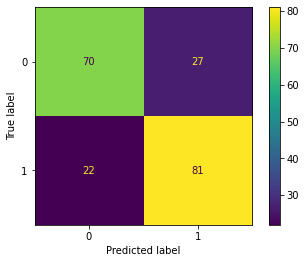

In [31]:
# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [32]:
# Evaluate the results
# accuracy score
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

accuracy_score:  0.755
precision_score:  0.75
recall_score:  0.7864077669902912
f1_score:  0.7677725118483412


# **KNN Model**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


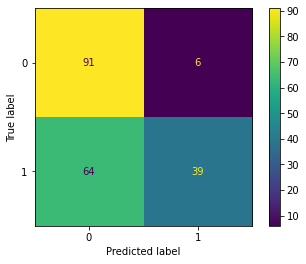

accuracy_score:  0.65
precision_score:  0.8666666666666667
recall_score:  0.3786407766990291
f1_score:  0.527027027027027


In [34]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
knn = KNeighborsClassifier(n_neighbors=4)
model = knn.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# **Support Vector Machine SVM Model**

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


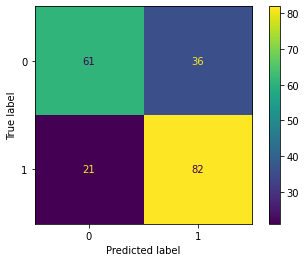

accuracy_score:  0.715
precision_score:  0.6949152542372882
recall_score:  0.7961165048543689
f1_score:  0.7420814479638009


In [36]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = svm.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# **Decision Tree Classification Model**

In [37]:
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


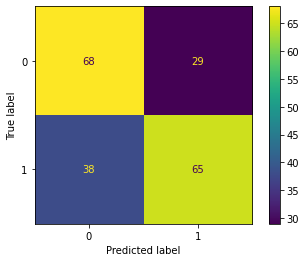

accuracy_score:  0.665
precision_score:  0.6914893617021277
recall_score:  0.6310679611650486
f1_score:  0.6598984771573605


In [38]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
dtc = DecisionTreeClassifier(random_state=0)
model = dtc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# **Random Forest Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


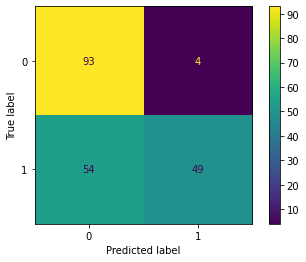

accuracy_score:  0.71
precision_score:  0.9245283018867925
recall_score:  0.47572815533980584
f1_score:  0.6282051282051283


In [40]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
model = rfc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# **Feature Extraction**

# *TF IDF*

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [42]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [43]:
X = corpus

In [44]:
X.shape

(1000, 179)

# **Modeling**

# Random Forest Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


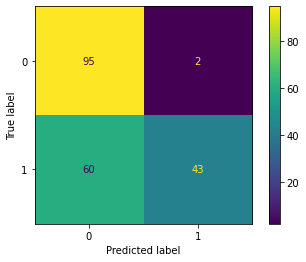

accuracy_score:  0.69
precision_score:  0.9555555555555556
recall_score:  0.4174757281553398
f1_score:  0.5810810810810811


In [45]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
model = rfc.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# Decision Tree Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


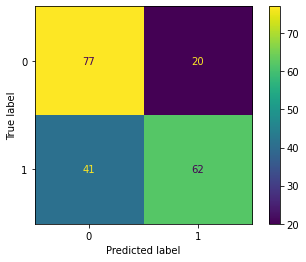

accuracy_score:  0.695
precision_score:  0.7560975609756098
recall_score:  0.6019417475728155
f1_score:  0.6702702702702702


In [46]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
dtc = DecisionTreeClassifier(random_state=0)
model = dtc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# Support Vector Machine SVM Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


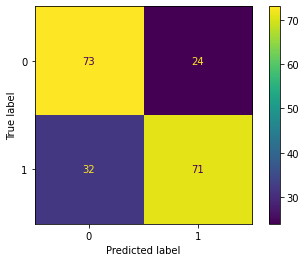

accuracy_score:  0.72
precision_score:  0.7473684210526316
recall_score:  0.6893203883495146
f1_score:  0.7171717171717172


In [47]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = svm.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# KNN Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


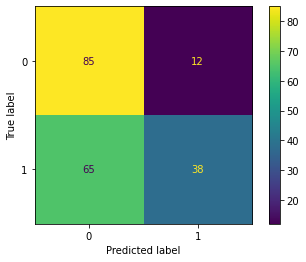

accuracy_score:  0.615
precision_score:  0.76
recall_score:  0.36893203883495146
f1_score:  0.4967320261437908


In [48]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
knn = KNeighborsClassifier(n_neighbors=4)
model = knn.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# Naive Bayes Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


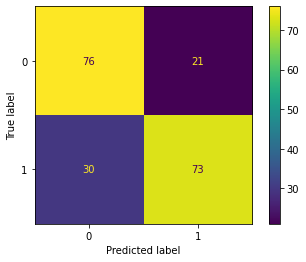

accuracy_score:  0.745
precision_score:  0.776595744680851
recall_score:  0.7087378640776699
f1_score:  0.7411167512690355


In [49]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
mnb = MultinomialNB()
model = mnb.fit(X_train, y_train)

# Predicting the Test set results 
# y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred = model.predict(X_test)
y_pred

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Evaluate the results
# accuracy score
print(f'accuracy_score: ', accuracy_score(y_pred, y_test))
# precision scores
print(f'precision_score: ', precision_score(y_test, y_pred))
# recall score
print(f'recall_score: ', recall_score(y_test, y_pred))
# f1_score
print(f'f1_score: ', f1_score(y_test, y_pred))

# **Questions**

**What is Natural Language processing and why is it important in the context of data analysis in today’s world?**

Answer: IBM Cloud Education (2020) describes Natural language processing (NLP) as "the branch of computer science — and more specifically, the branch of artificial intelligence or AI — concerned with giving computers the ability to understand text and spoken words in much the same way human beings can." NLP focuses on making natural human language usable by computer programs. Natural Language Toolkit (NLTK), is a Python package that you can use for NLP.

According to sas.com, NLP helps computers communicate with humans in their own language and scales other language-related tasks (e.g., NLP enables computers to read text, hear speech, interpret it, measure sentiment and determine which parts are important). As application in today's businesses, it can be used to analyze large volumes of text data.



**What is the purpose of stopwords in NLP?**

Answer: opinosis-analytics.com defines stop words as a set of commonly used words in a language (e.g, "a", "the", "is", "are", etc.), and are commonly used in Text Mining and NLP to eliminate most commonly used words that they carry very little useful information. Removing stopwords can be beneficial (e.g., low numbers of documents), as it reduces the dimensionality of your input space.

*   List item
*   List item



**What is the purpose of toarray() in the following code**

X = cv.fit_transform(corpus).toarray()

Answer: toarray() returns an ndarray representation of the transformed corpus matrix.

**Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.**

Performance of each model based on accuracy



 |Model| Bag of Words | TF IDF |
  |-------|:----------------:|:----------:|
  |Naive Bayes| 0.67|0.65|
  |KNN |0.66|0.64|
  |SVM|0.76|0.72|
  |Decision Tree|0.69|0.69|
  |Random Forest|0.74|0.66|



**Which model predicts the best ?**

Answer: For the Bag of Words, Naive Bayes has the best accuracy (0.755) and f1 (0.768) scores; SVM had the best recall (0.796); and Random Forest has the best precision (0.925).

For the Term Frequency - Inverse Document Frequency (TF-IDF), Naive Bayes has the best accuracy (0.745), recall (0.709), and f1 (0.741) scores. Random Forest has the best precision (0.956).

In general, based on the hyperparameters chosen, the Naive Bayes model outperforms all other models, whether it's in Bag of Words or TF-IDF.

# **Part 2**


# **Sentiment Analysis using NLP Part 2 with the new dataset**



In [50]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
# Read the file
df = pd.read_csv('Tweets.csv')

In [53]:
# Have a quick look at the dataset
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Perform Exploratory Analysis**

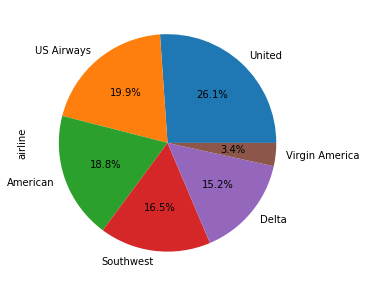

In [54]:
# Create a pie chart by airline %
df['airline'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5))
plt.show()

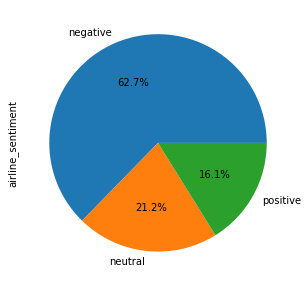

In [55]:
# Create a pie chart by airline sentiment
df['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5))
plt.show()

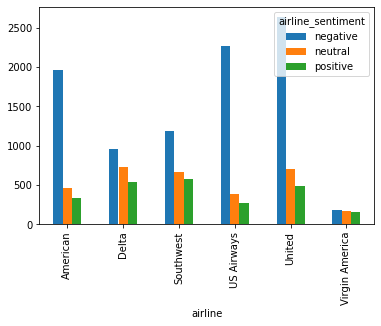

In [56]:
# Create a bar chart by airline and airline sentiment
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
plt.show()

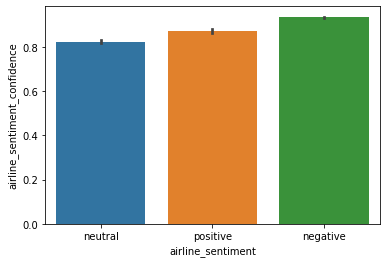

In [57]:
# Create a bar plot for airline sentiment and airline sentiment confidence
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence',data=df)
plt.show()

In [58]:
# Create a new dataframe that will only have 2 relevant columns
# Identify the 2 columns
# For airline_sentiment I only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe

new_df = df[["text", "airline_sentiment"]]
new_df = new_df[new_df.airline_sentiment != 'neutral']
new_df["airline_sentiment"]= new_df.airline_sentiment.replace("positive", 1)
new_df["airline_sentiment"]= new_df.airline_sentiment.replace("negative", 0)
new_df.head(5)

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


In [59]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 11541):
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i] )
    text = text.lower()
    text = text.split()
    ps =PorterStemmer()
    text = [ps.stem(word) for word in text if not  word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [61]:
corpus

['virginamerica dhepburn said',
 'virginamerica plu ad commerci experi tacki',
 'virginamerica today must mean need take anoth trip',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica know suicid second lead caus death among teen',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard n

# **Feature Extraction**

**Bag of Words Model**

In [62]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words

In [63]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [64]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
X.shape

(11541, 1500)

In [66]:
y = new_df.iloc[:, 1].values

In [67]:
y.shape

(11541,)

# **Modeling**

**Naive Bayes Model **

[[ 312 1555]
 [  44  398]]
Accuracy Score: 0.3074924209614552
Precision Score: 0.20378904249871993
Recall Score: 0.9004524886877828
F1 Score: 0.3323590814196242


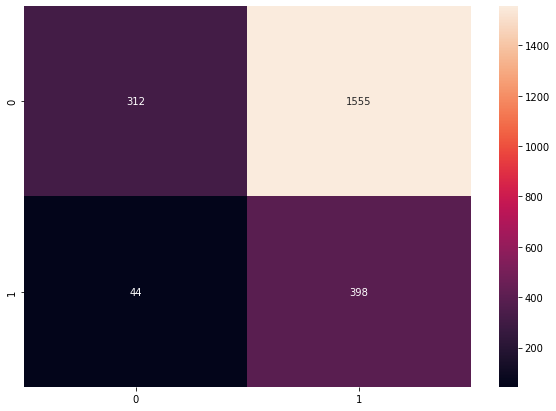

In [68]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 420)
# Fitting classifier to the Training set

from sklearn.naive_bayes import GaussianNB
cf_naive = GaussianNB()
cf_naive.fit(X_train,y_train)

# Predicting the Test set results 
y_pred = cf_naive.predict(X_test)


# Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print(cm)



# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

**KNN Model**

Accuracy Score: 0.7553053269813772
Precision Score: 0.2655367231638418
Recall Score: 0.0975103734439834
F1 Score: 0.1426403641881639


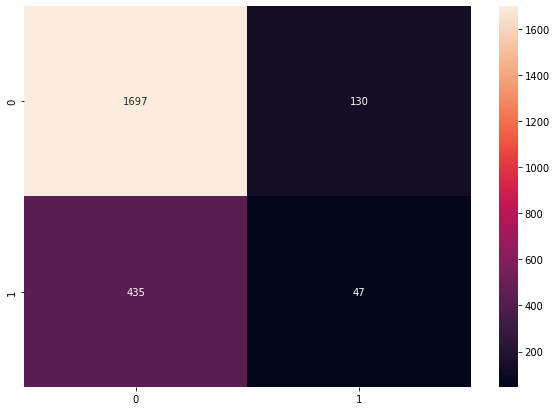

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 421)

# Fitting classifier to the Training set

from sklearn.neighbors import KNeighborsClassifier
cf_knn = KNeighborsClassifier(n_neighbors=2)
cf_knn.fit(X_train, y_train)  


# Predicting the Test set results 

y_pred = cf_knn.predict(X_test)


# Make the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')


# Evaluate the results

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

**Support Vector Machine SVM Model**

Accuracy Score: 0.7756604590731918
Precision Score: 0.21428571428571427
Recall Score: 0.018218623481781375
F1 Score: 0.033582089552238806


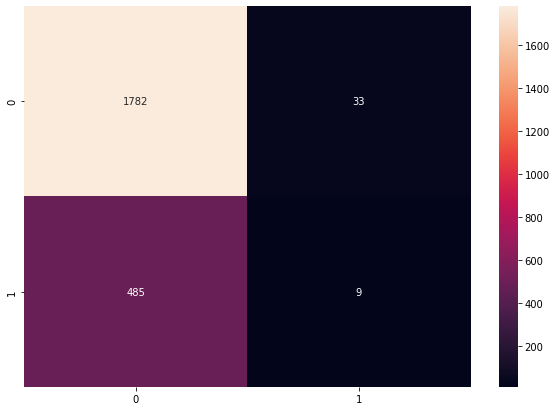

In [70]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 422)

# Fitting classifier to the Training set
from sklearn.svm import SVC
cf_svc = SVC(kernel='linear', random_state=0)
cf_svc.fit(X_train, y_train) 

# Predicting the Test set results 
y_pred = cf_svc.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

**Decision Tree Classification Model**

Accuracy Score: 0.6868774361195322
Precision Score: 0.25865580448065173
Recall Score: 0.2613168724279835
F1 Score: 0.2599795291709314


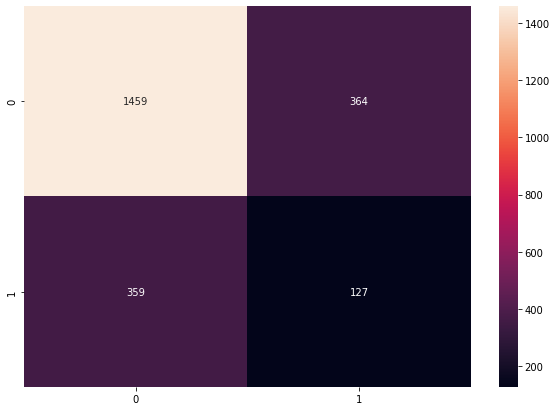

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 423)

# Fitting classifier to the Training set

from sklearn.tree import DecisionTreeClassifier 
cf_dt = DecisionTreeClassifier()
cf_dt.fit(X_train, y_train) 

# Predicting the Test set results 
y_pred = cf_dt.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')


# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

**Random Forest Model**

Accuracy Score: 0.7570376786487657
Precision Score: 0.2978723404255319
Recall Score: 0.08333333333333333
F1 Score: 0.13023255813953488


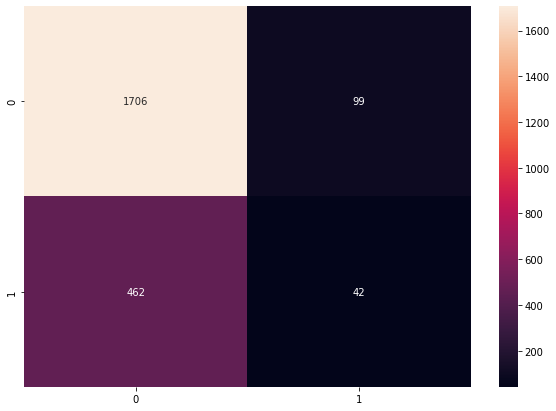

In [72]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 424)

# Fitting classifier to the Training set

from sklearn.ensemble import RandomForestClassifier
cf_rf = RandomForestClassifier(n_estimators=100)
cf_rf.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred = cf_rf.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

**Feature Extraction**

TF IDF

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [74]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [75]:
X =corpus

In [76]:
X.shape

(11541, 1646)

**Modeling**

Random Forest Model

Accuracy Score: 0.7918904869173453
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


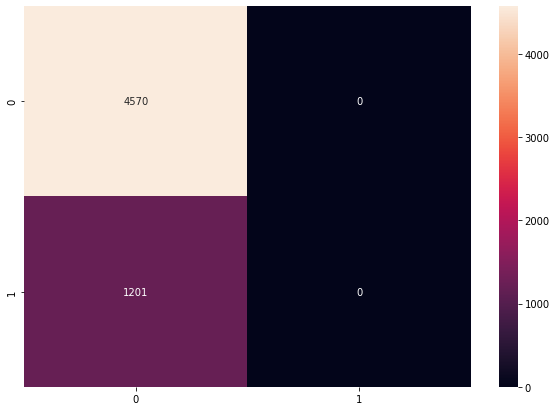

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

**Decision Tree Model**

Accuracy Score: 0.7094091145382083
F1 Score: 0.24831913939937247
Recall Score: 0.23064113238967526
Precision Score: 0.2689320388349515


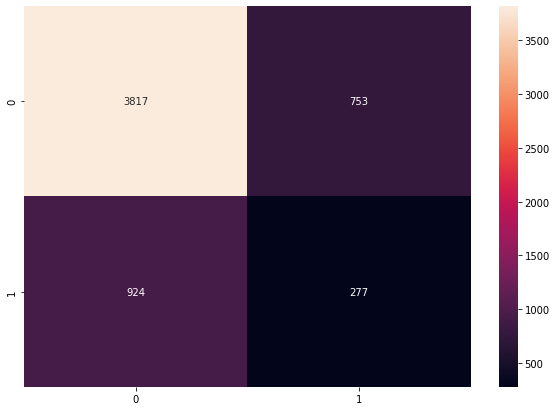

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model_tree.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

**Support Vector Machine SVM Model**

Accuracy Score: 0.7915439265291977
F1 Score: 0.0033140016570008283
Recall Score: 0.0016652789342214821
Precision Score: 0.3333333333333333


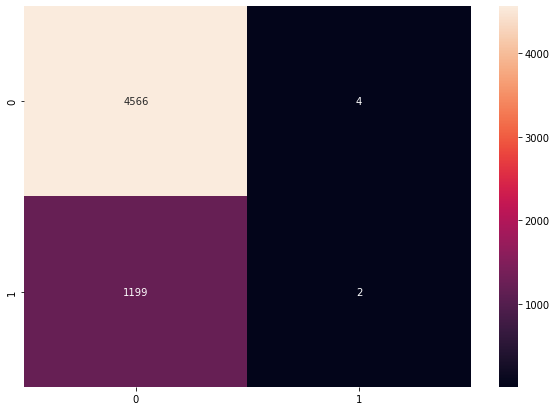

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn import svm

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
# C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train) # we can use rbf, poly instead of linear too.

# Predicting the Test set results 
y_pred = svc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

**KNN Model**

Accuracy Score: 0.7367873852018715
F1 Score: 0.15187046342825236
Recall Score: 0.11323896752706078
Precision Score: 0.2305084745762712


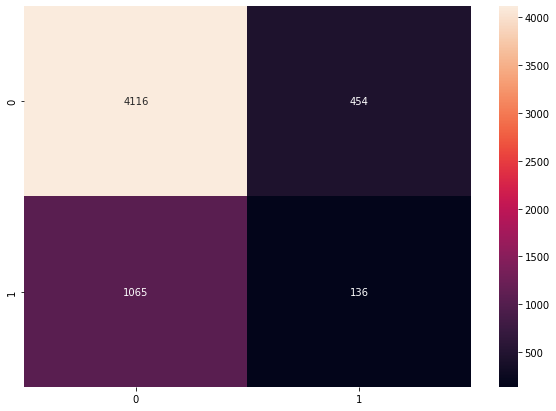

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

**Naive Bayes Model**

Accuracy Score: 0.3782706636631433
F1 Score: 0.3285928143712575
Recall Score: 0.7310574521232306
Precision Score: 0.21192372676804247


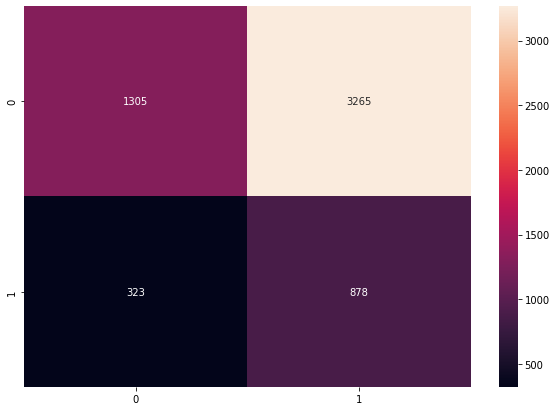

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

# Fitting classifier to the Training set
gnb.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = gnb.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

**Compare the various models on both the approaches.**


Performance of each model based on accuracy



 |Model| Bag of Words | TF IDF |
  |-------|:----------------:|:----------:|
  |Naive Bayes| 0.29|0.30|
  |KNN |0.76|0.75|
  |SVM|0.79|0.79|
  |Decision Tree|0.70|0.70|
  |Random Forest|0.77|0.78|

---



---



**Which model predicts the best?**

SVM predicts better results after features extraction